# Моделирование элементарного классического нейрона

## Задание

- Разработать программное обеспечение для реализации элементарного классического нейрона (язык программирования студент выбирает самостоятельно).
- Провести обучение элементарного классического нейрона.
- Провести распознавание неизвестного образа, для которого x=20.

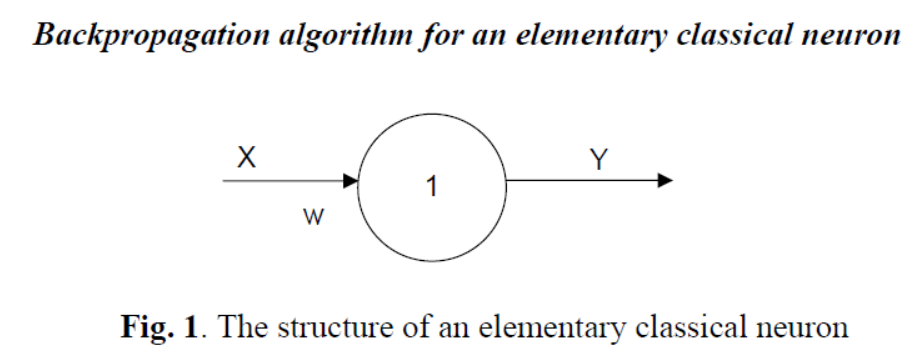

In [1]:
from numpy import exp
from random import sample

In [2]:
class Neuron:
    """ Elementary classical neuron """

    def __init__(self, X, Y, pe, w):
        """ Initialize neuron """
        self.X  = X  # input
        self.Y  = Y  # output
        self.pe = pe # permissible error
        self.w  = w  # weight


    def sigmoid(self, x):
        """ Sigmoid activation function """
        return 1 / (1 + exp(-x))


    def recognize(self, form):
        """ Recognize unknown form for the given value and return it or raise an exception if a learning error exists """
        
        # find input
        x_in = self.w * form
            
        # find output
        y_out = self.sigmoid(x_in)
    
        if self.has_learning_error(y_out):
            raise Exception(f"Oops, there is a learning error of {y_out:.6f} for the given form: {form:.6f}")
        else:
            return y_out


    def has_learning_error(self, y):
        """ Check if the given output has a learning error """
        return abs((self.Y - y) / self.Y) > self.pe


    def build_with_bpag(self):
        """ Build neural network using back propagation algorithm """
        
        print("--- Back propagation algorithm for the forward propagation network with a single neuron ---\n")
        print(f"Initial data: X={self.X}, Y={self.Y}, dd={self.pe}, w={self.w}\n")
        
        i = 1
        
        while True:
            # find input
            x_in = self.w * self.X
            
            # find output
            y_out = self.sigmoid(x_in)
            
            print(f"Epoch: {i:10}, w: {self.w:10.6f}")
            
            if not self.has_learning_error(y_out):
                print(f"\nNetwork parameters: X={self.X:.6f}, Y={self.Y:.6f}, dd={self.pe:.6f}, w={self.w:.6f}")
                print("\n--- Algorithm completed successfully! --- ")
                break
            else:
                # calculate correction parameters
                q = y_out * (1 - y_out) * (self.Y - y_out)
                b = q * y_out
                
                # correct weights by adding calculated biases
                self.w += b
                i += 1
    

    def test(self, n=1000):
        """ Test neural network against random data set """
        failed = 0        
        # generate unknown random forms
        for random_form in sample(range(0, n), n):
            try:
                self.recognize(random_form)
            except Exception as ex:
                failed += 1
        
        f_percent = (failed / n) * 100
        print(f"Forms count: {n}, fail: {f_percent:.6f}%, sucess: {(100 - f_percent):.6f}%")

In [3]:
""" Initial data """
X  = 8    # input signal
Y  = 0.3  # expected output signal
dd = 0.05 # permissible error
w  = 0.2  # weight

In [4]:
# create forward propagation network with the given parameters
fpn = Neuron(X, Y, dd, w)

In [5]:
# build network using back propagation algorithm
fpn.build_with_bpag()

--- Back propagation algorithm for the forward propagation network with a single neuron ---

Initial data: X=8, Y=0.3, dd=0.05, w=0.2

Epoch:          1, w:   0.200000
Epoch:          2, w:   0.138134
Epoch:          3, w:   0.074786
Epoch:          4, w:   0.023790
Epoch:          5, w:  -0.009769
Epoch:          6, w:  -0.031414
Epoch:          7, w:  -0.046218
Epoch:          8, w:  -0.056941
Epoch:          9, w:  -0.065055
Epoch:         10, w:  -0.071395
Epoch:         11, w:  -0.076472
Epoch:         12, w:  -0.080613
Epoch:         13, w:  -0.084041
Epoch:         14, w:  -0.086913
Epoch:         15, w:  -0.089342
Epoch:         16, w:  -0.091411
Epoch:         17, w:  -0.093187
Epoch:         18, w:  -0.094718
Epoch:         19, w:  -0.096045
Epoch:         20, w:  -0.097199

Network parameters: X=8.000000, Y=0.300000, dd=0.050000, w=-0.097199

--- Algorithm completed successfully! --- 


In [6]:
# unknow form
x = 20

In [7]:
# recognize the unknown form
fpn.recognize(x)

Exception: Oops, there is a learning error of 0.125210 for the given form: 20.000000

In [8]:
# start test
fpn.test(1_000_000)

<ipython-input-2-88cbc60af61f>:14: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + exp(-x))


Forms count: 1000000, fail: 99.999800%, sucess: 0.000200%


* From 1 million randomly generated forms only 0.0002% were recognized with sucess.
* It means that our network needs more neurons to calculate correct results.